## To use this slideshow:
- Run All, using the menu item: Kernel/Restart & Run All
- Return to this top cell
- click on "Slideshow" menu item above, that looks like this:
![](images/SlideIcon.png)

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)


<h1 align='center'>Artificial Intelligence for Educators</h1>

<h2 align='center'>with Laura G Funderburk & Tina Leard</h2>

<h4 align='center'>On Twitter: @LGFunderburk </h4>

![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)

<h2 align='center'> About the Callysto Program</h2>

- Provide open educational infrastructure and learning resources
- Focus on making computational thinking and data science/literacy available
- Use Jupyter notebooks as main platform
- Host teacher and student training workshops

<h3 align='center'>Brought to you by</h3>


| | | |
|-|-|-|
|<img src="./images/Cybera_Logo_RBG_Colour.png" alt="Drawing" style="width: 300px;"/>|<img src="./images/PIMS_Logos_Web_PIMS_Logo_Colour.png" alt="Drawing" style="width: 400px;"/>| <img src="./images/With_Funding_Canada_Wordmark-colour_BIL-EN.png" alt="Drawing" style="width: 400px;"/>|

<h2 align='center'>What is a Jupyter notebook?</h2>

A Jupyter notebook is an online document that can include both text and (Python) code in different “cells” or parts of the document.

These documents run on Callysto Hub as well as Google Colab, IBM Watson Studio, and other places.


This presentation is a Jupyter notebook!

<h2 align='center'>What is Callysto?</h2>

Callysto is a free, online learning tool that helps students and teachers learn and apply in-demand data science skills including data analysis, visualization, coding, and computational thinking. The online tool’s interactive learning modules are available in a variety of subjects – from math to history – and are aligned with existing curriculum.

Callysto’s learning modules are built using Jupyter notebooks.

<h2 align='center'> Callysto notebooks ready for you to use</h2>

On our website callysto.ca you will find lesson plans, courses and learning modules that support you incorporate coding into your stats lesson. 

#### Objective: explore how we can use Callysto to explore machine learning in the classroom


| |
|-|
|<img src="./images/samplenotebooks.png" width="600">|



<h2 align='center'>What is Data?</h2>

Data is a collection of information. Usually obtained (or collected) to address a specific issue. 

Examples of data:

- Daily number of COVID-19 cases in Canada.
- The grades of your class. 
- Census data.

<center><img src="https://img2.pngio.com/download-free-png-19-data-graph-icon-packs-vector-icon-packs-data-graph-png-600_564.png" width="400"></center>

<h2 align='center'>What is Data Science?</h2>

Data science involves <b>obtaining</b> and <b>communicating</b> information from (usually large) sets of observations.


| |
|-|
| <img src="./images/what-is-data-science-workflow.jpg" alt="Drawing" style="width:800px;"/> |



<h2 align='center'>What is Artificial Intelligence?</h2>

Artificial Intelligence (AI) is a blanket term describing all efforts to make computer “think”.

Machine Learning (ML) algorithms are programs that improve, or “learn”, through exposure to data/experience.

ML is based on the idea that machines should be able to learn and adapt through experience. AI refers to a broader idea where machines can execute tasks "smartly."

AI applies ML and other techniques to solve actual problems.



<h2 align='center'>Let's work through an example</h2>


Let's take a look at a problem involving biology. Can we "train" a machine to predict what type of Iris flower we are studying, based on its petal and sepal length and/or width?

![Iris flower](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# Step 1: Collecting data 

- We will use the Iris flower data set (also known as Fisher's Iris data set or Anderson's Iris data set). 

- Two of the three species were collected in the Gaspé Peninsula: same location, picked and measured on the same day, by the same person, with the same instrument.

- Data set: 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

- Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<h3 align='center'>This data set has been collected and cleaned</h3>

<h3 align='center'>Our focus: exploratory analysis</h3>

# Step 2: Manage & Clean Data

In [1]:
# load and visualize the data
from pandas import read_csv
from sklearn import datasets
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
# machine learning
from sklearn.model_selection import train_test_split
# compare algorithms
from sklearn.svm import SVC
# Evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df['y'] = y

df['y'].replace({0:"Iris-setosa",
           1: "Iris-versicolor",
           2: "Iris-virginica"},inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3: Exploratory analysis

### Getting summary stats for all Iris flowers

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Getting summary stats for specific types of Iris flower

In [4]:
setosa = df[df['y']=='Iris-setosa']
versicolor = df[df['y']=='Iris-versicolor']
virginica = df[df['y']=='Iris-virginica']

virginica.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### Generating visualization from summary stats

In [5]:
import ipywidgets as widgets
from IPython.display import display
dropdowna = widgets.Dropdown(
    options=['petal length (cm)', 'petal width (cm)', 'sepal length (cm)','sepal width (cm)'],
    value='petal length (cm)',
    description='Measurement:',
    disabled=False,
)

Dropdown(description='Measurement:', options=('petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 's…

Box plot for Iris class: petal length (cm)


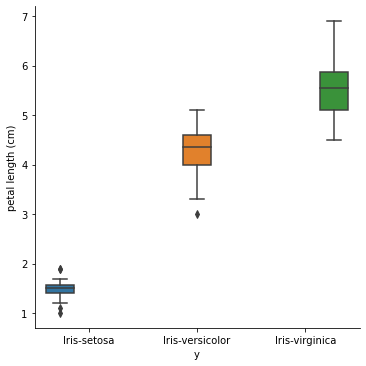

In [6]:
# box and whisker plots
display(dropdowna)
print("Box plot for Iris class:",dropdowna.value)
sns.catplot(x="y", y=dropdowna.value, data=df,hue='y',kind='box');
#sns.swarmplot(x="y", y=dropdown.value, data=df);

### Generating distribution visualization

In [7]:
dropdownb = widgets.Dropdown(
    options=['petal length (cm)', 'petal width (cm)', 'sepal length (cm)','sepal width (cm)'],
    value='petal length (cm)',
    description='Measurement:',
    disabled=False,
)

Dropdown(description='Measurement:', options=('petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 's…

Histogram for various measurements (per class):  petal length (cm)


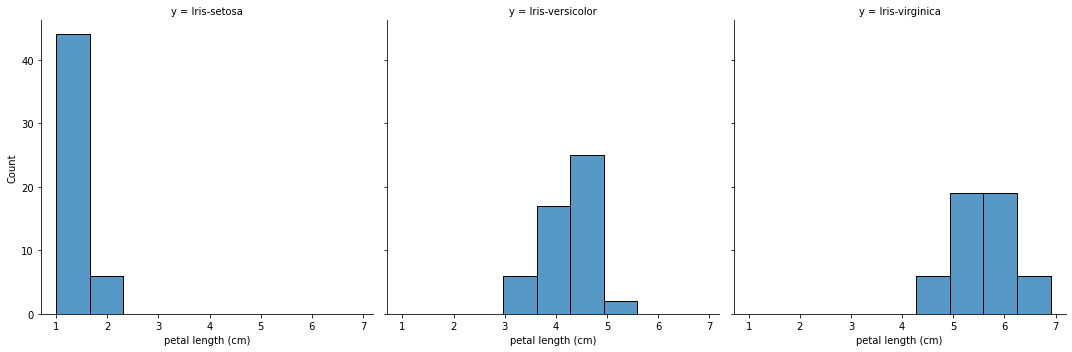

In [8]:
display(dropdownb)
print("Histogram for various measurements (per class): ",dropdownb.value)
sns.displot(df, x=dropdownb.value, col="y", multiple="dodge");

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

### More visualizations

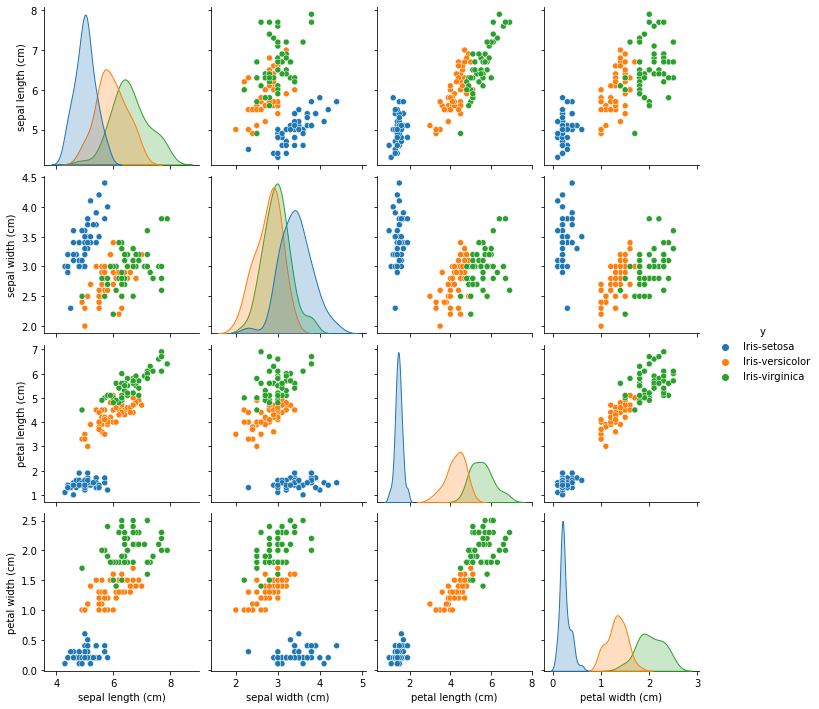

In [9]:
sns.pairplot(df,hue='y');

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

## Can we predict class of Iris based on these four measurements?

Looks promising!

### Machine learning technique

Split data set into training and testing data.

We will provide random data points for the algorithm to "learn" (training set). 

We will test how well the model does by providing the testing set to the algorithm after it trains. 


In [10]:
array = df.values
# All measurements
X = array[:,0:4]
# All classes
y = array[:,4]
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

We will use Support Vector Machines (SVM) - a type of algorithm exploring non-linear relationships.

In [11]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [12]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

In [13]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The metrics are calculated by using true and false positives, true and false negatives.



Precision is the ability of a classifier not to label an instance positive that is actually negative.

Recall is the ability of a classifier to find all positive instances. For each class, it is the ratio of true positives to the sum of true positives and false negatives.

F1-score is the average of precision and recall, where each of the two measurements are given equal weight. 1.0 is the best score, 0.0 is the worst score. 

The support is the number of samples of the true response that lie in that class.

Confusion matrix


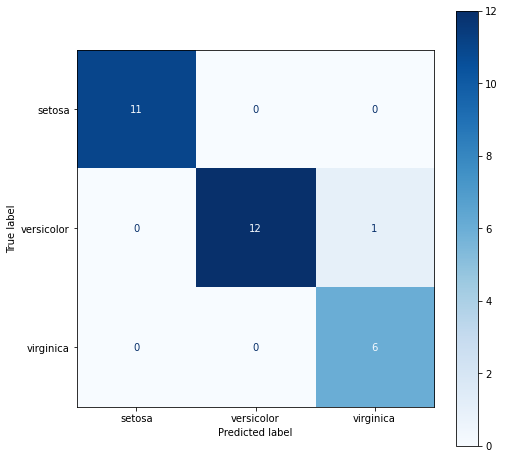

In [14]:
classifier = model.fit(X_train, Y_train)
class_names = iris.target_names
print("Confusion matrix")
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(classifier, X_validation, Y_validation,display_labels=class_names,cmap=plt.cm.Blues,
                      normalize=None,ax=ax);

 The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

# Step 4: Final Analysis

### Let's take a look at the predicted values

In [15]:
pred_df = pd.DataFrame(X_validation,columns=df.columns[0:4])

pred_df['Predicted Class'] = predictions

In [16]:
dropdownc = widgets.Dropdown(
    options=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    value='Iris-setosa',
    description='Class:',
    disabled=False,
)

In [17]:
## 11 setosa, 12 versicolor, 7 virginica
display(dropdownc)
pred_df[pred_df['Predicted Class']==dropdownc.value]

Dropdown(description='Class:', options=('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), value='Iris-setos…

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted Class
0,5.8,4,1.2,0.2,Iris-setosa
3,5.4,3.9,1.3,0.4,Iris-setosa
7,5.1,3.8,1.9,0.4,Iris-setosa
8,4.7,3.2,1.6,0.2,Iris-setosa
11,5.4,3.9,1.7,0.4,Iris-setosa
15,4.4,3.2,1.3,0.2,Iris-setosa
18,5.4,3.4,1.5,0.4,Iris-setosa
19,5,3.2,1.2,0.2,Iris-setosa
23,5,3.5,1.3,0.3,Iris-setosa
26,5.5,4.2,1.4,0.2,Iris-setosa


### Which one did it get wrong? 


In [18]:
import numpy as np
y_test = np.asarray(Y_validation)
misclassified = np.where(y_test != model.predict(X_validation))

print(misclassified)

(array([22]),)


# Step 5: Reporting

The algorithm classified one sample as virginica, when it was versicolor.

This entry is in row with index 22.

<h2 align='center'> What are the potential impacts on education and society, and how do we talk to students about all of this? </h2>

- What happens when we apply ML to problems involving human choices? 

- Example: who gets approved for a mortgage, who gets admitted to high school, who is selected for a job interview

Impact of error present in algorithm must be considered. 

Predictions will be made based on training data that is provided $\Rightarrow$ bias in training data increases probability for bias in predicted outcome. 

#### To prevent this: bias must be addressed when a scientist asks a question and proceeds to the data collection stage in the data science process.  

<h2 align='center'>Real examples</h2>

Amazon ditches AI recruiting tool that didn’t like women (Reuters) [link](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G)


Can Racist Algorithms Be Fixed? (The Marshall Project) [link](https://www.themarshallproject.org/2019/07/01/can-racist-algorithms-be-fixed)


Black and Asian faces misidentified more often by facial recognition software (CBC) [link](https://www.cbc.ca/news/technology/facial-recognition-race-1.5403899)


UK ditches exam results generated by biased algorithm after student protests (The Verge) [link](https://www.theverge.com/2020/8/17/21372045/uk-a-level-results-algorithm-biased-coronavirus-covid-19-pandemic-university-applications)

<h2 align='center'> What can we do? </h2>

- Work towards addressing our own biases in the classroom and daily life

- Identify how our biases play a role in our decision making

- Identify how our biases affect the machines we program 

- Collaborate with people offering diverse points of view

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h2 align='center'>Getting Started with Callysto</h2>

- Feedback form https://tinyurl.com/y2a3uhdt
- Online self-paced courses (courses.callysto.ca)  
- Preview our learning modules https://callysto.github.io/curriculum-jbook/intro.html
- Contact us for “in-class” workshops, teacher PD, virtual hackathons, and more

Email: contact@callysto.ca

On Twitter: @callysto_canada

Site: https://www.callysto.ca

YouTube https://www.youtube.com/channel/UCPdq1SYKA42EZBvUlNQUAng 

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)